# K-means Clustering
K-mean clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

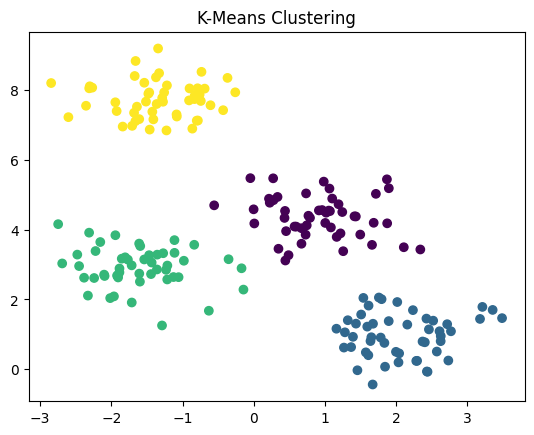

In [16]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#generate data
X, y_true = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)

# initiate a KMeans object with the number of cluster
kmeans = KMeans(n_clusters=4)

# fit the data
kmeans.fit(X)

# get the cluster labels
labels = kmeans.predict(X)

# plot the data points with different colors for different clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()